# Adult InCome Data Analysis 

## Introduction

### Data

The title of this data is Adult and it's the original owners is US Census Bureau. The donors are Ronny Kohavi and Barry Becker, Data Mining and Visualization Silicon Graphics, e-mail: ronnyk@sgi.com. The adult income data was received on May 19, 1996, it may change over time without name change.

The adult income data is downloaded from: https://www.kaggle.com/datasets/wenruliu/adult-income-dataset?select=adult.csv

As the author of this page:

"This dataset named “adult” is found in the UCI machine learning repository http://www.cs.toronto.edu/~delve/data/adult/desc.html     

The detailed description on the dataset can be found in the original UCI documentation
http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html "


This dataset has 48,842 entries and each entry contains the following information about an individual:

#### Attribute Information:   

Class Values (Income level): >50K, <=50K

#### Attributes:  
There are 6 continuous, 8 nominal attributes.  
 
1. age: (continuous) the age of the individual.   
2. workclass: (categorical) the employment status of an individual.   
3. fnlwgt: (continuous) final weight of the record, this is the number of people the census believes the entry represents.   
4. education: (categorical) the highest level of education achieved by an individual.   
5. education-num: (continuous) the number of years of education.   
6. marital-status: (categorical) marital status of an individual.
7. occupation: (categorical) the general type of occupation of an individual.   
8. relationship: (categorical) Relationship in terms of the family.   
9. race: (categorical) race of an individual.   
10. sex: (categorical) the biological sex of the individual.   
11. capital-gain: (continuous) dollar gain of capital.   
12. capital-loss: (continuous) dollar loss of capital.   
13. hours-per-week: (continuous) working hours per week.   
14. native-country: (categorical) country at birth.   


### Project Topic

My goal is to predict whether an individual’s income will be greater than $50,000 per year based on several attributes from the adult income data, therefore, it's a classification task. I'll find which features affect the most to income level of each individual by visualizing, running some models and examine which model is the best? 

To analyze this data, I would like to make an overview of the solution:
* Part 1: Import and Explore data
* Part 2: Tidy and Transform data
* Part 3: Add Visualization and Analysis
* Part 4: Build Models
* Part 5: Discussion and Conclusion

That's just the overview of what I did, next, I'll figure out the solution step by step more clearly below:

## Part 1: Import and Explore Data

In [1]:
# importing all the required libraries

from sklearn import preprocessing

import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [2]:
# read data
data = pd.read_csv("Dataset.data", sep=" ", header=None)

In [3]:
# take a look at some rows of the data
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
# rename the columns of the data for more understandable
data. rename(columns={0:"age" ,1:"workclass", 2:"finalweight", 3:"education", 4:"education_num", 5:"marital_status", 6:"occupation", 
                    7:"relationship", 8:"race", 9:"sex", 10:"capital_gain", 11:"capital_loss", 12:"hours_per_week",
                    13:"native_country", 14:"income_level"},inplace=True)
data.head()

,age,workclass,finalweight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
# summarize the shape of the dataset
print(data.shape)

(48842, 15)


## Part 2: Tidy and Transform Data

In [6]:
# get a quick description of the data
data.describe()

,age,finalweight,education_num,capital_gain,capital_loss,hours_per_week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
# the structure of the adult income dataset also tells us the number of rows (observations) and columns (variables)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   finalweight     48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  income_level    48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


The output above shows that there are 48842 rows and 15 columns in this data, it also contains a row for each column of the dataset. For each column label we get the count of non null entries and the data type of the entry.

Knowing the data type of the columns in the dataset allows us to make better judgements when it comes to using the data to train models.

Moreover, the description output shows that there are many zero values in capital gain and capital loss columns. Additional, two features final weight and relationship are not useful for my analysis. Thus, I'll remove these four features from the data and to simplify, I'll drop education column as well because of the existence of education-num column.

In [8]:
# remove unused columns of the data
df = data.drop(["finalweight", "relationship", "capital_gain", "capital_loss", "education"], axis=1)
df.head()

,age,workclass,education_num,marital_status,occupation,race,sex,hours_per_week,native_country,income_level
0,25,Private,7,Never-married,Machine-op-inspct,Black,Male,40,United-States,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,White,Male,50,United-States,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,White,Male,40,United-States,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Black,Male,40,United-States,>50K
4,18,?,10,Never-married,?,White,Female,30,United-States,<=50K


In [9]:
# check null values in the data
df.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
race              0
sex               0
hours_per_week    0
native_country    0
income_level      0
dtype: int64

In [10]:
# get unique values of each column:
for col in df:
    print(df[col].unique().tolist())

[25, 38, 28, 44, 18, 34, 29, 63, 24, 55, 65, 36, 26, 58, 48, 43, 20, 37, 40, 72, 45, 22, 23, 54, 32, 46, 56, 17, 39, 52, 21, 42, 33, 30, 47, 41, 19, 69, 50, 31, 59, 49, 51, 27, 57, 61, 64, 79, 73, 53, 77, 80, 62, 35, 68, 66, 75, 60, 67, 71, 70, 90, 81, 74, 78, 82, 83, 85, 76, 84, 89, 88, 87, 86]
['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov', 'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked']
[7, 9, 12, 10, 6, 15, 4, 13, 14, 16, 3, 11, 5, 8, 2, 1]
['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced', 'Separated', 'Married-spouse-absent', 'Married-AF-spouse']
['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?', 'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical', 'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv', 'Transport-moving', 'Handlers-cleaners', 'Armed-Forces']
['Black', 'White', 'Asian-Pac-Islander', 'Other', 'Amer-Indian-Eskimo']
['Male', 'Female']
[40, 50, 30, 32, 10, 39, 35, 48, 25, 20, 45, 47, 6, 43, 9

As the output above, we can see that there are no null values in the data, however there are some question mark charaters (?) in the data. So:
+ First, I would like to know which columns contain these missing values?
+ Second, I'll replace those missing values by NaN for imputing them easier. 
+ Then, I'll check missing values in the data again.

In [11]:
# get the name of columns have missing values
ls = [col for col in list(df.columns) if '?' in df[col].unique().tolist()]
ls

['workclass', 'occupation', 'native_country']

In [12]:
# replace question mark characters by NaN
df = df.replace('?', np.NaN)

In [13]:
# check missing values in the data again
df.isnull().sum()

age                  0
workclass         2799
education_num        0
marital_status       0
occupation        2809
race                 0
sex                  0
hours_per_week       0
native_country     857
income_level         0
dtype: int64

The output shows that there are 2799 missing values in workclass column, 2809 missing values in occupation column and 857 missing values in native country column. Now, I'll calculate the proportion of missing values by the number of entries in each column and use seaborn to visualize these missing values.

In [14]:
# calculate the proportion of missing values by the number of entries
w_missing = df['workclass'].isna().sum()/len(df) * 100
o_missing = df['occupation'].isna().sum()/len(df) * 100
n_missing = df['native_country'].isna().sum()/len(df) * 100
print("The proportion of missing values in workclass is: {}%.".format(round(w_missing,2)))
print("The proportion of missing values in occupation is: {}%.".format(round(o_missing,2)))
print("The proportion of missing values in native country is: {}%.".format(round(n_missing,2)))

The proportion of missing values in workclass is: 5.73%.
The proportion of missing values in occupation is: 5.75%.
The proportion of missing values in native country is: 1.75%.


<Figure size 720x432 with 0 Axes>

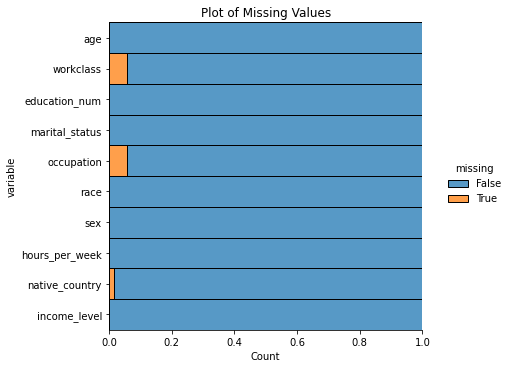

In [15]:
# plot missing values with barplot seaborn
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25).set(title='Plot of Missing Values')

In [16]:
# count the unique values in work class column
df["workclass"].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

So, there are 5.73% of missing values in workclass, 5.75% in occupation and 1.75% in native country. To deal with these missing values:
+ First, because 1.75% just is a small number (less than 5%) in a large data, so I'll drop those rows that have missing values in native_country.
+ Next, because the number of missing values in occupation column are not too much (about 5%), so I'll replace those missing values with the most frequent value in each column. 
+ In work class column, there are only 31 values that are not make sense such as: "Without-pay" and "Never-worked", thus I'll remove rows contain these nonsense values and replace missing values in this column with the most frequent value. 

In [17]:
# drop missing value rows of native_country column
df = df[df['native_country'].notna()]

In [18]:
# check if removed missing value rows of native country column
len(df)

47985

In [19]:
# drop rows that contain "Without-pay" and "Never-worked" in workclass column
df = df[df.workclass != "Without-pay"]
df = df[df.workclass != "Never-worked"]

In [20]:
# check if removed nonsense rows
len(df)

47954

In [21]:
# replace missing values in workclass and occupation by the most frequent value
df = df.fillna(df.mode().iloc[0])

In [22]:
# check missing value in data after imputation
df.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
race              0
sex               0
hours_per_week    0
native_country    0
income_level      0
dtype: int64

From the result of checking missing values in the data, we can see that there are no missing values anymore. 

Next, I would like to check for the imbalance of the data by calculating the proportion of each label in class values and plot the income level.

In [23]:
# calculate the count of each label
df['income_level'].value_counts()

<=50K    36489
>50K     11465
Name: income_level, dtype: int64

In [24]:
# calculate the count of each label
df['income_level'].value_counts()/len(df)*100

<=50K    76.091671
>50K     23.908329
Name: income_level, dtype: float64

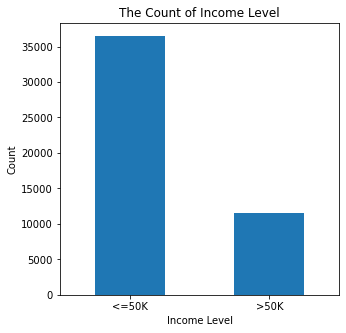

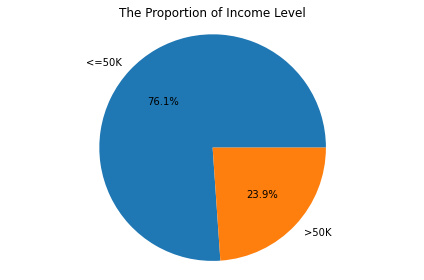

In [25]:
# plot the count of income level
fig, ax = plt.subplots(figsize=(5,5))
df['income_level'].value_counts().plot(kind='bar', ax=ax)
plt.xlabel("Income Level")
plt.xticks(rotation=360)
plt.ylabel("Count")
plt.title("The Count of Income Level")

# plot the proportion of income level
labels = df['income_level'].unique().tolist()
counts = df['income_level'].value_counts()
sizes = [counts[v] for v in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.title("The Proportion of Income Level")

plt.tight_layout()
plt.show()


So, there are 76.1% the number of observations are at income level of <= 50k and 23.9% at income level of > 50k. It means the data does not have an equal number of examples from each class, the class distribution is imbalanced.   

Next, I'll visualize some plots to look for any data-specific potential problems. 

In [26]:
# correlation between numerical variables
cormat = df.corr()
round(cormat,2)

,age,education_num,hours_per_week
age,1.00,0.03,0.07
education_num,0.03,1.00,0.14
hours_per_week,0.07,0.14,1.00


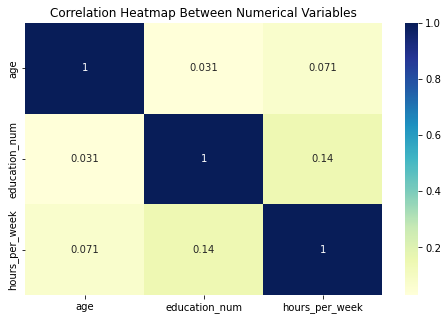

In [27]:
# use heatmap display the correlation between numerical variables
fig = plt.figure(figsize=(8,5))
sns.heatmap(cormat, cmap="YlGnBu", annot=True)
plt.title("Correlation Heatmap Between Numerical Variables")
plt.show()

In [28]:
# create a melted dataframe for plotting the numerical variables
df_melted = pd.melt(df[["age", "education_num", "hours_per_week"]])

#view first 10 rows of melted data frame
df_melted.head(10)

,variable,value
0,age,25
1,age,38
2,age,28
3,age,44
4,age,18
5,age,34
6,age,29
7,age,63
8,age,24
9,age,55


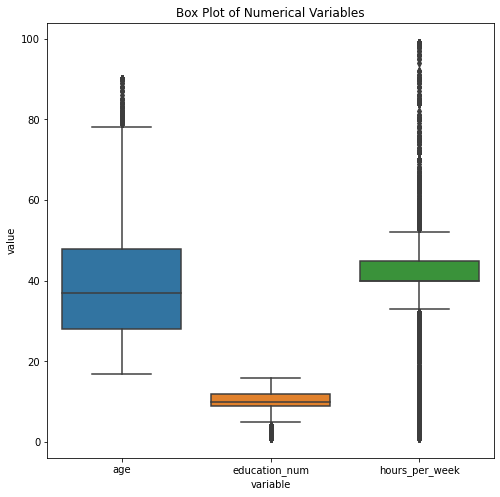

In [29]:
# visualize the box plots of numerical variables
fig = plt.figure(figsize=(8,8))
sns.boxplot(x='variable', y='value', data=df_melted)
plt.title("Box Plot of Numerical Variables")
plt.show()

Based on these plots above we see that it looks like the data just has normal distribution, there is not any outliers or any potential problem and these numerical variables do not have strong relationship between them.  

## Part 3: Add Visualization and Analysis

To gain insights about which features would be most helpful for this project, I'll look at the feature and the distribution of observations that are labeled > 50k and <= 50k. By answering some questions, I hope to identify features that provide little information in order to simplify our model’s complexity and runtime. 

#### Question 1: How old are individuals that earn income greater than 50k and less than 50k?

First, with age feature, I would like to create a new column to group age for visualizing easier. As the output from running data info above, it shows that the min age is 17, and the max age is 90, so I'll divide age column to 8 groups: '17-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90'. Then, I'll visualize the distribution of Age and the distribution of Age Group and Income Level. 

In [30]:
# create a new column named AgeGroup to group age 
bins= [17,20,30,40,50,60,70,80,90]
labels = ['17-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90']
df['agegroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# view 5 first rows of the data
df.head()

,age,workclass,education_num,marital_status,occupation,race,sex,hours_per_week,native_country,income_level,agegroup
0,25,Private,7,Never-married,Machine-op-inspct,Black,Male,40,United-States,<=50K,21-30
1,38,Private,9,Married-civ-spouse,Farming-fishing,White,Male,50,United-States,<=50K,31-40
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,White,Male,40,United-States,>50K,21-30
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Black,Male,40,United-States,>50K,41-50
4,18,Private,10,Never-married,Craft-repair,White,Female,30,United-States,<=50K,17-20


In [31]:
# create age value counts dataframe
age = df['age'].value_counts().to_frame()
age = pd.DataFrame(age)
age = age.reset_index()
age.columns = ['unique_values', 'counts for age']
age

,unique_values,counts for age
0,36,1319
1,23,1315
2,33,1314
3,35,1313
4,31,1299
...,...,...
69,85,5
70,88,5
71,87,3
72,89,2


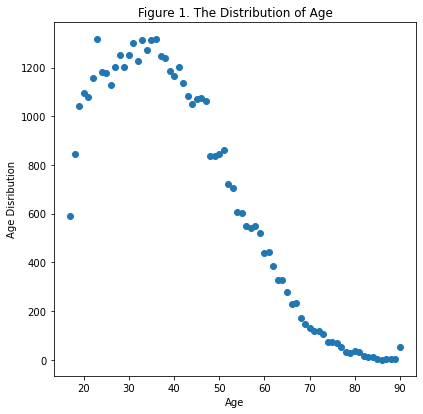

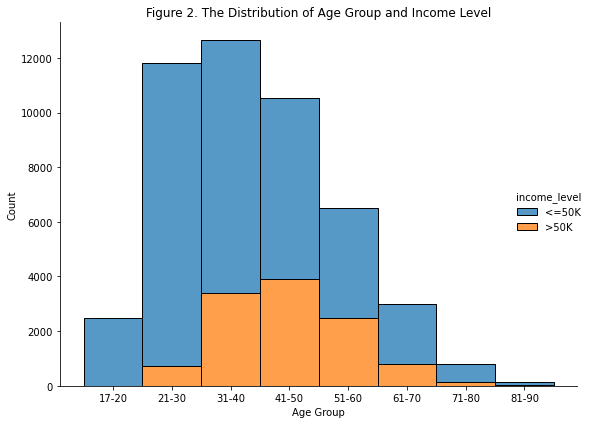

In [32]:
# plot Age Distribution
fig = plt.figure(figsize=(6.5,6.5))
plt.scatter(age["unique_values"], age["counts for age"])
plt.xlabel("Age")
plt.ylabel("Age Disribution")
plt.title("Figure 1. The Distribution of Age")

# plot the distribution of Age vs Income Level
sns.displot(df, x="agegroup", hue="income_level", multiple="stack", height=6, aspect=1.2)
plt.xlabel("Age Group")
plt.title("Figure 2. The Distribution of Age Group and Income Level")

plt.tight_layout()
plt.show()

The first plot above describes the age distribution among the obsevations in our dataset. The age of individual is from 17 to 90 years old with the majority is in range from 25 to 50 years old.   

The second plot above shows that there is a significant variance between the count of individuals who have income less than or equal 50k and who have income greater than 50k at each age group. There are three age groups that almost did not get income greater than 50k such as: 17-20, 71-80 and 81-90. On the other hand, 31-40, 41-50 and 51-60 are three age groups that have the most count of individuals who have income greater than 50k.

#### Question 2: What are the work classes of individuals which they can earn income larger than 50k?

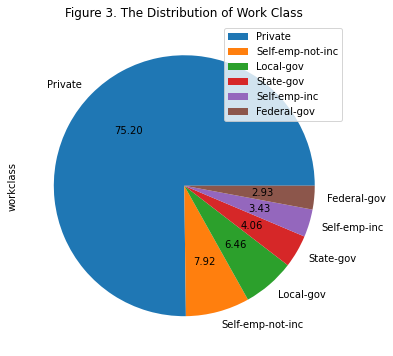

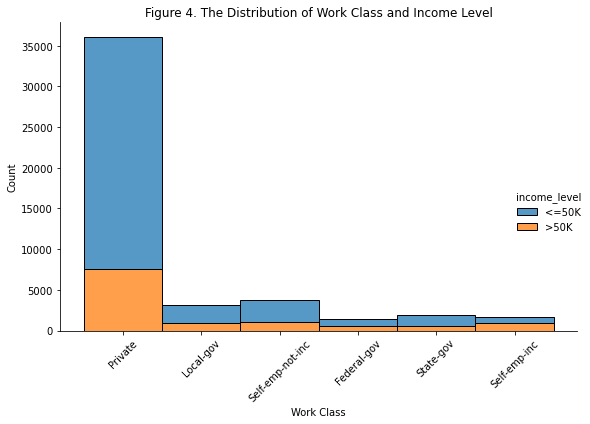

In [33]:
# plot the distribution of Work Class
fig, ax = plt.subplots(figsize=(6,6))
df["workclass"].value_counts().plot(kind='pie', autopct='%.2f', ax=ax, fontsize=10)
plt.legend()
plt.title("Figure 3. The Distribution of Work Class")

# plot the distribution of Work Class vs Income Level
sns.displot(df, x="workclass", hue="income_level", multiple="stack", height=6, aspect=1.2)
plt.xlabel("Work Class")
plt.xticks(rotation=45)
plt.title("Figure 4. The Distribution of Work Class and Income Level")

plt.tight_layout()
plt.show()

In the distribution of work class, we can see that the largest amount of observations in the dataset are private (75.15%), so, it's so imbalanced, maybe I should consider this feature in building the model.

The figure 4 indicates that the proportion of getting income larger than 50k are almost similar between different work classes, except for self employed incorporated (self-emp-inc) and federal government (federal-gov). It looks like individual who work for federal government have more chance of earning income above 50k than other work classes. And self employed incorporated who own their owned company have higher chance of earning more than 50k as well.

#### Question 3: Which native country there are more individuals who earn income larger than 50k?

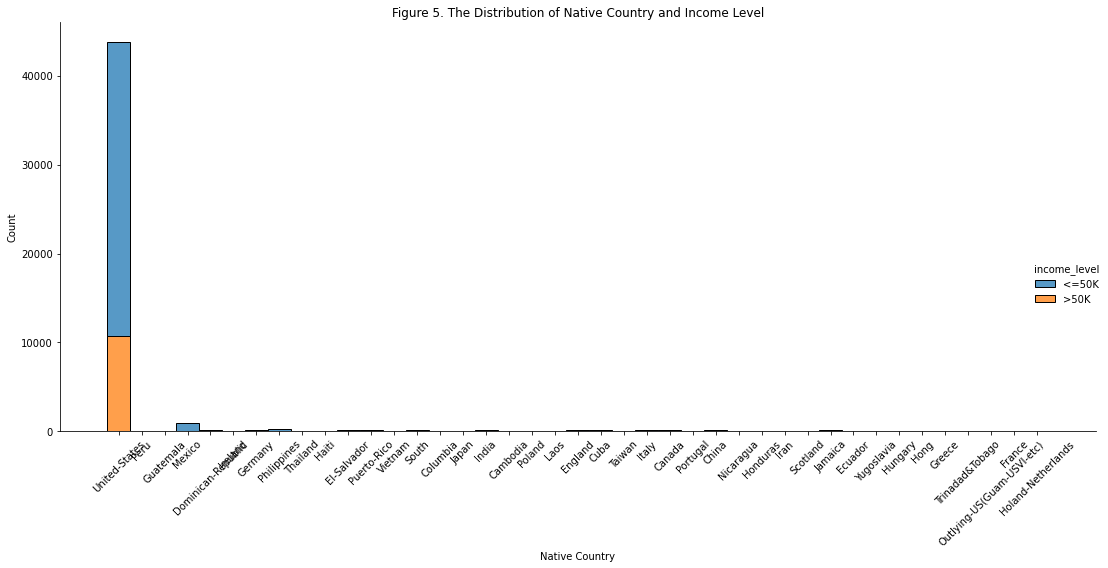

In [34]:
# plot the distribution of Native Country vs Income Level
sns.displot(df, x="native_country", hue="income_level", multiple="stack", height=8, aspect=1.8)
plt.xlabel("Native Country")
plt.xticks(rotation=45)
plt.title("Figure 5. The Distribution of Native Country and Income Level")

plt.tight_layout()
plt.show()

In [35]:
# calculate the proportion of native country of observations
df["native_country"].value_counts()/len(df)*100

United-States                 91.341702
Mexico                         1.983151
Philippines                    0.613088
Germany                        0.429578
Puerto-Rico                    0.383701
Canada                         0.379530
El-Salvador                    0.323226
India                          0.314885
Cuba                           0.287776
England                        0.264837
China                          0.254410
South                          0.239813
Jamaica                        0.221045
Italy                          0.218960
Dominican-Republic             0.214789
Japan                          0.191851
Guatemala                      0.183509
Poland                         0.181424
Vietnam                        0.179339
Columbia                       0.177253
Haiti                          0.156400
Portugal                       0.139717
Taiwan                         0.135547
Iran                           0.123035
Greece                         0.102181


As we can see from figure 5 above, in this data, almost individuals are from United States (91.3%) and just only over 8% from many other countries. Thus, because native country is the disproportionate feature, I think it is not a good factor for building model, thus I'll not use it later.

#### Question 4: What is the distribution of Race and Income Level?

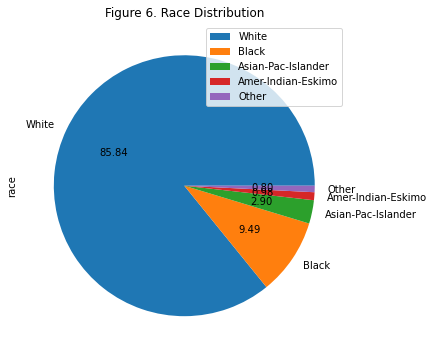

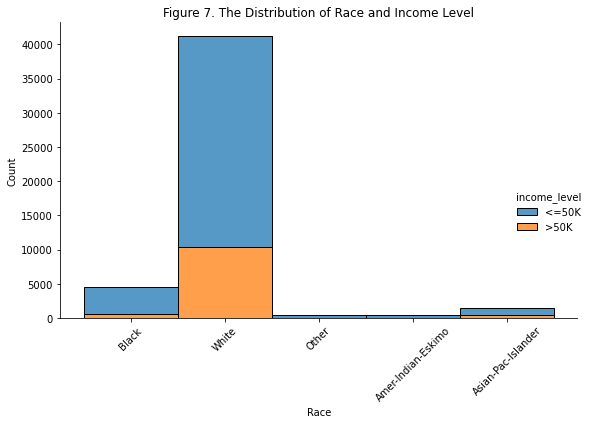

In [36]:
# plot the distribution of Race
fig, ax = plt.subplots(figsize=(6,6))
df["race"].value_counts().plot(kind='pie', autopct='%.2f', ax=ax, fontsize=10)
plt.legend()
plt.title("Figure 6. Race Distribution")

# plot the distribution of Race vs Income Level
sns.displot(df, x="race", hue="income_level", multiple="stack", height=6, aspect=1.2)
plt.xlabel("Race")
plt.xticks(rotation=45)
plt.title("Figure 7. The Distribution of Race and Income Level")

plt.tight_layout()
plt.show()

Looking at the figure 6, the most of individuals in this dataset are white (85.84%), the second most are black (9.49%).

Figure 7 shows that black, White and Asian-Pac_Islander are three groups that have income greater than 50k. There is a racial imbalance in our data that might make this feature less vital in building model. Moreover, if we compare the income distribution across different race, we don’t see any significant differences between income level and race.

#### Question 5: How many hour per week do the observations work for earning income?

With hours per week feature, as the output from running data info above, there's a big variance between the min hours per week is 1, and the max is 99, so I would like to create a new column to group it for visualizing easier. First, I'll divide hours per week column to 3 groups: '<40','40','>40' because it has the mean of 40. Then, I'll visualize the distribution of Hours Per Week and the distribution of Hours Per Week Group and Income Level.

In [37]:
# create a new column named AgeGroup to group age 
bins= [1,40,40.5,99]
labels = ['<40','40','>40']
df['hourgroup'] = pd.cut(df['hours_per_week'], bins=bins, labels=labels, right=False)

# view 5 first rows of the data
df.head()

,age,workclass,education_num,marital_status,occupation,race,sex,hours_per_week,native_country,income_level,agegroup,hourgroup
0,25,Private,7,Never-married,Machine-op-inspct,Black,Male,40,United-States,<=50K,21-30,40
1,38,Private,9,Married-civ-spouse,Farming-fishing,White,Male,50,United-States,<=50K,31-40,>40
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,White,Male,40,United-States,>50K,21-30,40
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Black,Male,40,United-States,>50K,41-50,40
4,18,Private,10,Never-married,Craft-repair,White,Female,30,United-States,<=50K,17-20,<40


In [38]:
# create age value counts dataframe
hours = df['hours_per_week'].value_counts().to_frame()
hours = pd.DataFrame(hours)
hours = hours.reset_index()
hours.columns = ['unique_values', 'counts for hours']
hours

,unique_values,counts for hours
0,40,22370
1,50,4169
2,45,2663
3,60,2132
4,35,1908
...,...,...
91,79,1
92,69,1
93,87,1
94,94,1


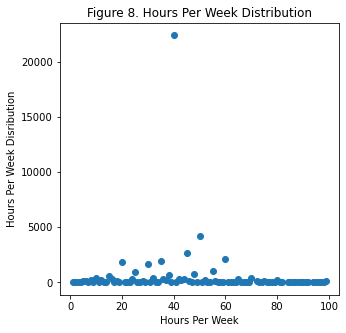

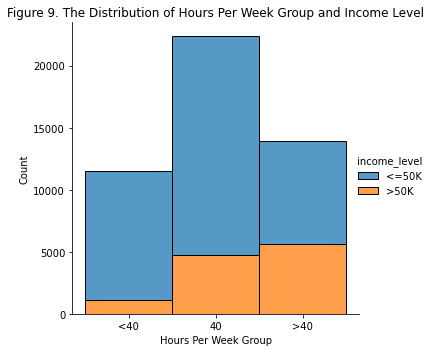

In [39]:
# plot Hours Per Week Distribution
fig = plt.figure(figsize=(5,5))
plt.scatter(hours["unique_values"], hours["counts for hours"])
plt.xlabel("Hours Per Week")
plt.ylabel("Hours Per Week Disribution")
plt.title("Figure 8. Hours Per Week Distribution")

# plot the distribution of Age vs Income Level
sns.displot(df, x="hourgroup", hue="income_level", multiple="stack", height=5, aspect=0.8)
plt.xlabel("Hours Per Week Group")
plt.title("Figure 9. The Distribution of Hours Per Week Group and Income Level")

plt.tight_layout()
plt.show()

Figure 8 shows that, the majority of observations work around 40 hours per week and that's societal working hours.

Looking at the figure 9, we see that there's a high decrease in income when individuals work less than 40 hours per week and an significantly increase in income when individuals work more than 40 hours per week. 

#### Question 6: Male or Female who have more chance of earning income greater than 50k?

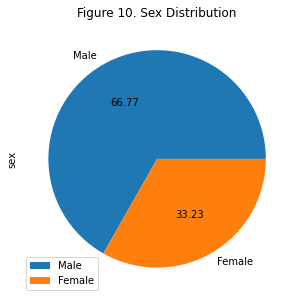

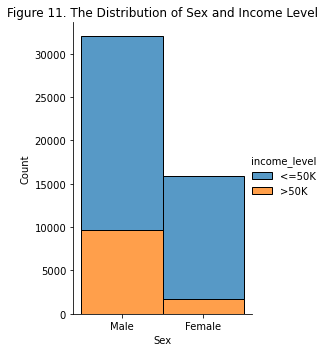

In [40]:
# plot the distribution of Race
fig, ax = plt.subplots(figsize=(5,5))
df["sex"].value_counts().plot(kind='pie', autopct='%.2f', ax=ax, fontsize=10)
plt.legend()
plt.title("Figure 10. Sex Distribution")

# plot the distribution of Race vs Income Level
sns.displot(df, x="sex", hue="income_level", multiple="stack", height=5, aspect=0.5)
plt.xlabel("Sex")
plt.title("Figure 11. The Distribution of Sex and Income Level")

plt.tight_layout()
plt.show()

Looking at figure 10, the majority of individuals are male (66.77%), the amount of male is almost double the amount of female in this data.

Figure 11 shows that the proportion of male who have income greater than 50k is larger than the proportion of female who have income greater than 50k. I think this feature will certainly be a significant factor, and should be a feature considered in my prediction model. 

#### Question 7: Do individuals with different marital status have different income level? An individual with which marital status have income more than 50k?

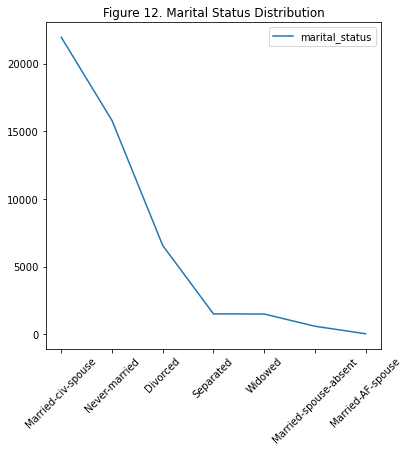

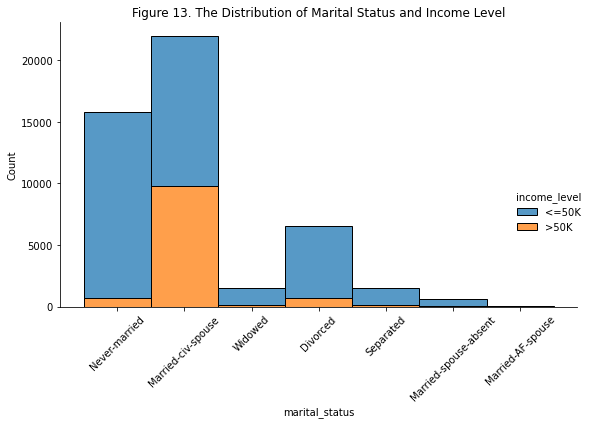

In [41]:
# plot the distribution of Race
fig, ax = plt.subplots(figsize=(6,6))
df["marital_status"].value_counts().plot(kind='line', ax=ax, fontsize=10)
plt.legend()
plt.xticks(rotation=45)
plt.title("Figure 12. Marital Status Distribution")

# plot the distribution of Race vs Income Level
sns.displot(df, x="marital_status", hue="income_level", multiple="stack", height=6, aspect=1.2)
plt.xlabel("marital_status")
plt.xticks(rotation=45)
plt.title("Figure 13. The Distribution of Marital Status and Income Level")

plt.tight_layout()
plt.show()

Figure 12 and 13 indicate that majority of observations are married and the most of individuals who have high income are married civilian spouse while widowed, separated, married spouse absent or married armed force spouse groups almost have no chance to earn income greater than 50k. 

#### Question 8: How did the year of education affect income level?

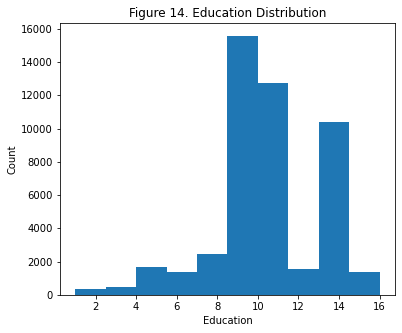

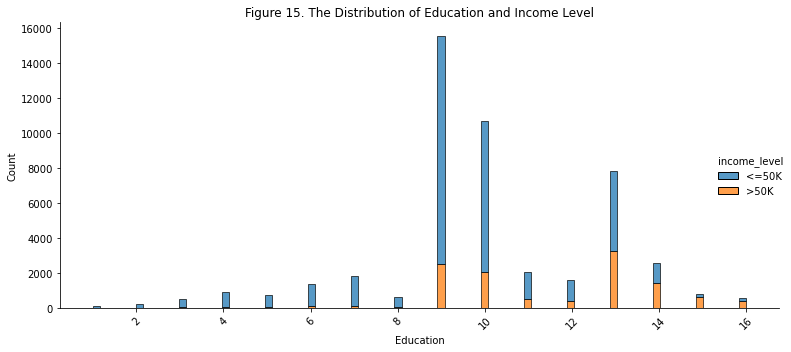

In [42]:
# plot the distribution of Education Number
fig, ax = plt.subplots(figsize=(6,5))
plt.hist(df["education_num"])
plt.xlabel("Education")
plt.ylabel("Count") 
plt.title("Figure 14. Education Distribution")

# plot the distribution of Race vs Income Level
sns.displot(df, x="education_num", hue="income_level", multiple="stack", height=5, aspect=2)
plt.xlabel("Education")
plt.xticks(rotation=45)
plt.title("Figure 15. The Distribution of Education and Income Level")

plt.tight_layout()
plt.show()

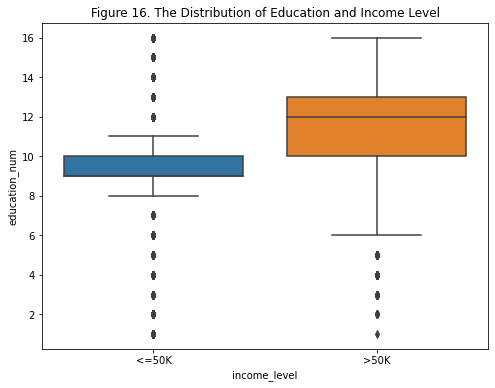

In [43]:
# use box plot visualize the distribution of Education vs Income Level
plt.subplots(figsize=(8,6))
ax= sns.boxplot(x='income_level',y='education_num',data=df)
plt.title("Figure 16. The Distribution of Education and Income Level")
plt.show()

Figure 14 shows that almost observations have at least 9 years of education while there's only a small portion has over 15 years of education.

Based on figure 15 and 16, we can see that almost the individuals whose income greater than 50k have at least 9 years of education. In general, the higher number of years of education, the higher proportion of having income greater than 50k, I think it's fair representation. However, an interesting thing here is that there are a lot of people with long term education still have income less than 50k.

#### Question 9: How did the kind of occupation affect individual's income?

In [44]:
# create age value counts dataframe
occu = df['occupation'].value_counts().to_frame()
occu = pd.DataFrame(occu)
occu = occu.reset_index()
occu.columns = ['unique_values', 'counts_for_occupation']
occu

,unique_values,counts_for_occupation
0,Craft-repair,8772
1,Prof-specialty,6008
2,Exec-managerial,5983
3,Adm-clerical,5537
4,Sales,5407
5,Other-service,4806
6,Machine-op-inspct,2968
7,Transport-moving,2315
8,Handlers-cleaners,2044
9,Farming-fishing,1472


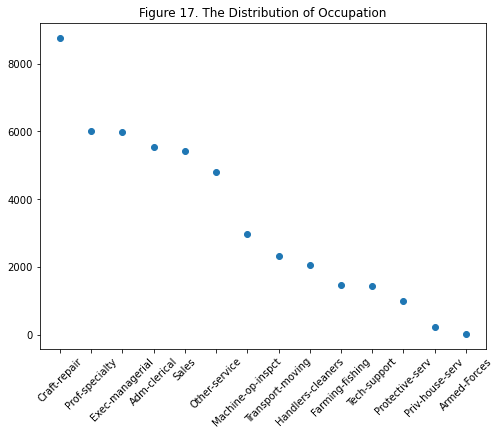

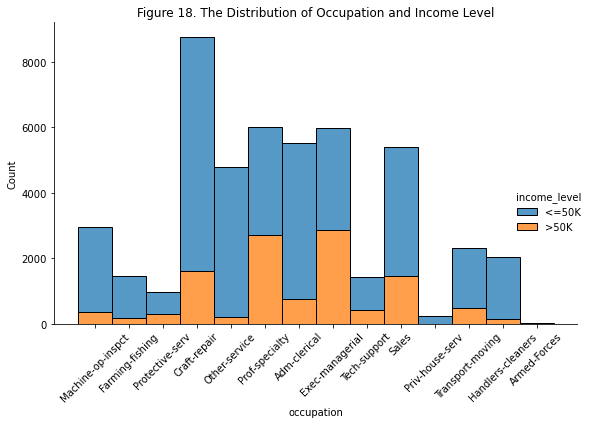

In [45]:
# plot the distribution of Occupation
fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(occu["unique_values"], occu["counts_for_occupation"])
plt.xticks(rotation=45)           
plt.title("Figure 17. The Distribution of Occupation")
plt.show()

# plot the distribution of Occupation vs Income Level
sns.displot(df, x="occupation", hue="income_level", multiple="stack", height=6, aspect=1.2)
plt.xlabel("occupation")
plt.xticks(rotation=45)
plt.title("Figure 18. The Distribution of Occupation and Income Level")

plt.tight_layout()
plt.show()

Figure 17 shows that the most occupation of the observations is craft-repair, there are only 14 persons work in armed-forces field and it is the least occupation of the individuals.

From figure 18, we can see that individuals who work in priv-house-serv and armed-forces do not have any chance earn income greater than 50k. The other sevice has the highest proportion of earning low income, on the other hand, prof-specialty and exec-managerial have the highest proportion of earning income greater than 50k. 

## Part 4: Build Models

Because there are numerical and categorical variables in our data, we need to encode categorical variables to prepare for building models. First, I'll drop two columns of agegroup and hourgroup, create a list of column name of object type data.

Because we need to predict whether income greater than 50k, it is a classification tasks, I'll build Random Forest model. Because this method reduce in over-fitting and produces good predictions that can be understood easily. It can handle large datasets efficiently. The random forest algorithm provides a higher level of accuracy in predicting outcomes over the decision tree algorithm.

Next, I also build the Extra Trees model, this algorithm works by creating a large number of unpruned decision trees from the training dataset and predictions are made by using majority voting in the case of classification.

Moreover, I'll try to build KNN and Logistic model as well and compare the results from these four models. In KNN classification is computed from a simple majority vote of the k nearest neighbours of each point. This algorithm is simple to implement, robust to noisy training data, and effective if training data is large. However, need to determine the value of K and as it needs to compute the distance of each instance to all the training samples, the computation cost is high. Logistic Regression is designed for classification, and is most useful for understanding the influence of several independent variables on a single outcome variable.

Then, I'll execute step by step as below:

+ Step 1: Encode categorical variables.    
+ Step 2: Use Correlation Matrix Heatmap to identify multicollinearity between variables, then to reduce the dimensionality of the dataset.   
+ Step 3: Down sample the train data to erase the imbalance problems within the labels.    
+ Step 4: Train the model   
+ Step 5: Make predictions on test set   
+ Step 6: Evaluation using precision score, recall score and cross-validation-score
+ step 7: Computing the importance of each feature and plot to compare the importance between features

In [46]:
# drop agegroup and hourgroup column
df = df.drop(columns=['agegroup', 'hourgroup'])

# list of the name of columns have object type
catogrical_col = [f for f in df.columns if df[f].dtypes == "object"]

# using LabelEncoder to encode categorical variables
for feature in catogrical_col:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
    
# check if data already transformed    
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47954 entries, 0 to 48841
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             47954 non-null  int64
 1   workclass       47954 non-null  int64
 2   education_num   47954 non-null  int64
 3   marital_status  47954 non-null  int64
 4   occupation      47954 non-null  int64
 5   race            47954 non-null  int64
 6   sex             47954 non-null  int64
 7   hours_per_week  47954 non-null  int64
 8   native_country  47954 non-null  int64
 9   income_level    47954 non-null  int64
dtypes: int64(10)
memory usage: 5.0 MB


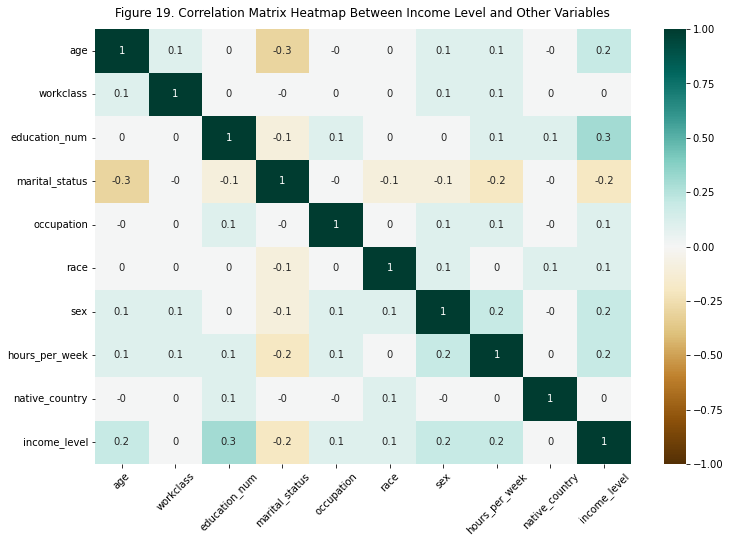

In [47]:
# visualize the correlation matrix heatmap between the class and other variables
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(df.corr().round(1), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.xticks(rotation=45)
heatmap.set_title('Figure 19. Correlation Matrix Heatmap Between Income Level and Other Variables', fontdict={'fontsize':12}, pad=12);

As figure 19, we observe that there are no highly predictors that are associated with high multicollinearity, however, there are no correlations between income level and work class, native country. Therefore, I'll drop these two features to reduce the dimensionality of the dataset.

In [48]:
# drop workclass and native_country column
df.drop(["workclass", "native_country" ], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47954 entries, 0 to 48841
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             47954 non-null  int64
 1   education_num   47954 non-null  int64
 2   marital_status  47954 non-null  int64
 3   occupation      47954 non-null  int64
 4   race            47954 non-null  int64
 5   sex             47954 non-null  int64
 6   hours_per_week  47954 non-null  int64
 7   income_level    47954 non-null  int64
dtypes: int64(8)
memory usage: 4.3 MB


In [49]:
# setting X as input features and y as target feature
X = df.drop('income_level',axis=1)
y = df['income_level']

In [50]:
# splitting the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
feature_names = list(df.columns)

#### Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier

# train random forest model
randomforest = RandomForestClassifier(n_estimators = 25)
randomforest = randomforest.fit(X_train, y_train)

In [55]:
# make prediction on test set
ran_predict = randomforest.predict(X_test)

In [59]:
# confusion matrix
cm = pd.DataFrame(
    confusion_matrix(y_test, ran_predict, labels=[0, 1]), 
    index=['<=50K:0', '>50K:1'], 
    columns=['pred:0', 'pred:1']
)
print(cmtx)

         pred:0  pred:1
<=50K:0    8198     969
>50K:1     1235    1587


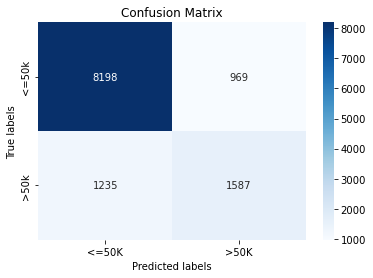

In [63]:
# plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues');  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['<=50K', '>50K']); ax.yaxis.set_ticklabels(['<=50k', '>50k']);

In [64]:
# calculate precision score
random_acc = accuracy_score(y_test, predict)
random_acc

0.8161648177496038

In [65]:
# calculate precision score
precision_score(y_test, predict)

0.6208920187793427

In [66]:
# calculate recall score
recall_score(y_test, predict)

0.5623671155209071

In [67]:
# apply cross-validation method to the model and check the training accuracy
random_cv_scores = cross_val_score(randomforest, X_train, y_train, cv=3 )
print("CV average score: %.2f" % random_cv_scores.mean())

CV average score: 0.81


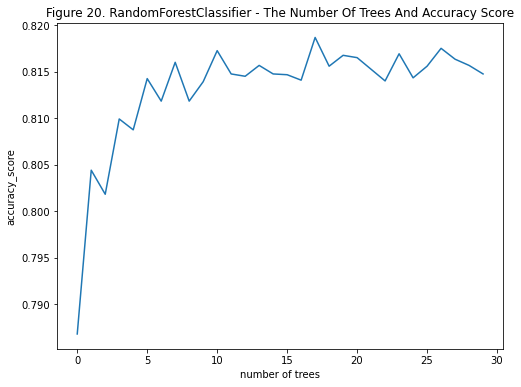

In [68]:
# plot the number of trees and accuracy score
trees = range(30)
accuracy=np.zeros(30)

for idx in range(len(trees)):
    clf = RandomForestClassifier(n_estimators = idx + 1)
    clf = clf.fit(X_train, y_train)
    predict = clf.predict(X_test)
    accuracy[idx] = accuracy_score(y_test, predict)

plt.subplots(figsize=(8,6))
plt.plot(trees, accuracy)
plt.xlabel("number of trees")
plt.ylabel("accuracy_score")
plt.title("Figure 20. RandomForestClassifier - The Number Of Trees And Accuracy Score")

plt.show()

In [69]:
# get max accuracy
print(max(accuracy))

0.8186671115188923


In [70]:
# the number of trees which get max accuracy
max_index_acc = np.argmax(accuracy, axis=0)
print(trees[max_index_acc])

17


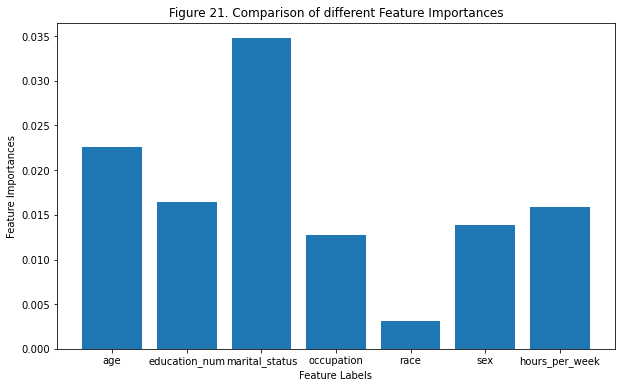

In [71]:
# Computing the importance of each feature
feature_importance = randomforest.feature_importances_
  
# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        randomforest.estimators_],
                                        axis = 0)

# Plotting a Bar Graph to compare the models
plt.subplots(figsize=(10,6))
plt.bar(X_train.columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Figure 21. Comparison of different Feature Importances')
plt.show()

#### Extra Trees Classifier

In [72]:
from sklearn.ensemble import ExtraTreesClassifier

# train extratrees model
extratrees = ExtraTreesClassifier(n_estimators=100)
extratrees.fit(X_train, y_train)

ExtraTreesClassifier()

In [73]:
# make prediction on test set
extra_predict = extratrees.predict(X_test)

In [74]:
# confusion matrix
cm2 = pd.DataFrame(
    confusion_matrix(y_test, extra_predict, labels=[0, 1]), 
    index=['<=50K:0', '>50K:1'], 
    columns=['pred:0', 'pred:1']
)
print(cm2)

         pred:0  pred:1
<=50K:0    8251     916
>50K:1     1325    1497


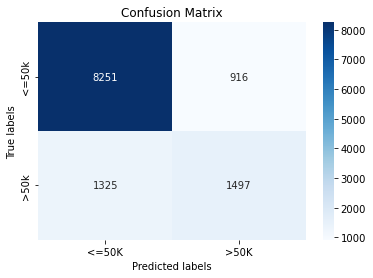

In [75]:
# plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm2, annot=True, fmt='g', ax=ax, cmap='Blues');  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['<=50K', '>50K']); ax.yaxis.set_ticklabels(['<=50k', '>50k']);

In [76]:
# calculate accuracy score
extra_acc = accuracy_score(y_test, extra_predict)
extra_acc

0.8130786554341479

In [77]:
# calculate precision score
precision_score(y_test, extra_predict)

0.6203895565685869

In [78]:
# calculate recall score
recall_score(y_test, extra_predict)

0.530474840538625

In [79]:
# apply cross-validation method to the model and check the training accuracy
extra_cv_scores = cross_val_score(extratrees, X_train, y_train, cv=3 )
print("CV average score: %.2f" % extra_cv_scores.mean())

CV average score: 0.81


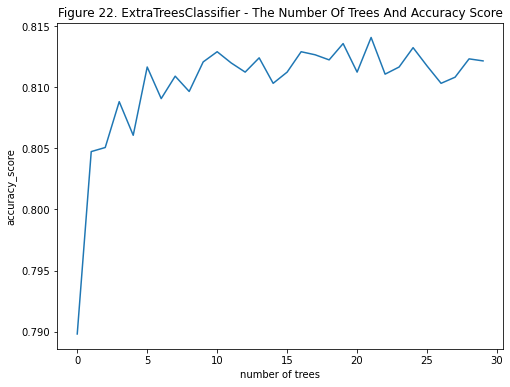

In [80]:
# plot the number of trees and accuracy score
trees = range(30)
accuracy=np.zeros(30)

for idx in range(len(trees)):
    clf = ExtraTreesClassifier(n_estimators = idx + 1)
    clf = clf.fit(X_train, y_train)
    predict = clf.predict(X_test)
    accuracy[idx] = accuracy_score(y_test, predict)

plt.subplots(figsize=(8,6))
plt.plot(trees, accuracy)
plt.xlabel("number of trees")
plt.ylabel("accuracy_score")
plt.title("Figure 22. ExtraTreesClassifier - The Number Of Trees And Accuracy Score")

plt.show()

In [81]:
# get max accuracy
print(max(accuracy))

0.8140795729418634


In [82]:
# the number of trees which get max accuracy
max_index_acc = np.argmax(accuracy, axis=0)
print(trees[max_index_acc])

21


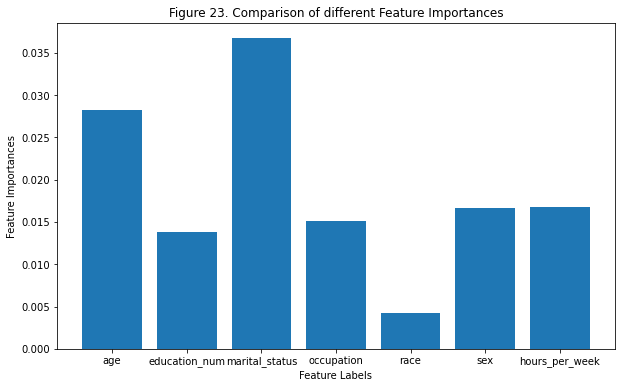

In [83]:
# Computing the importance of each feature
feature_importance = extratrees.feature_importances_
  
# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extratrees.estimators_],
                                        axis = 0)

# Plotting a Bar Graph to compare the models
plt.subplots(figsize=(10,6))
plt.bar(X_train.columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Figure 23. Comparison of different Feature Importances')
plt.show()

As the outputs above, we can see that the precision score, recall score and cross validation score of RandomForest model and ExtraTrees model are almost similar.  

After iterating the number of trees to find the max accuracy, we will get the max accuracy with the number of trees in RandomForest and ExtraTrees model.

Both of RandomForest (Figure 21) and ExtraTrees (Figure23) model shows that the most important feature are marital_status and age, the least important feature is race.

#### KNN

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score

# train knn model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [85]:
# make probability prediction on test set
knn_yhat = knn.predict_proba(X_test)

In [86]:
# roc curve for knn model
fpr1, tpr1, thresh1 = roc_curve(y_test, knn_yhat[:,1], pos_label=1)

In [87]:
# auc for knn model
auc1 = roc_auc_score(y_test, knn_yhat[:,1])
auc1

0.800032057335664

In [88]:
# apply cross-validation method to the model and check the training accuracy
knn_cv_scores = cross_val_score(knn, X_train, y_train, cv=3 )
print("CV average score: %.2f" % knn_cv_scores.mean())

CV average score: 0.79


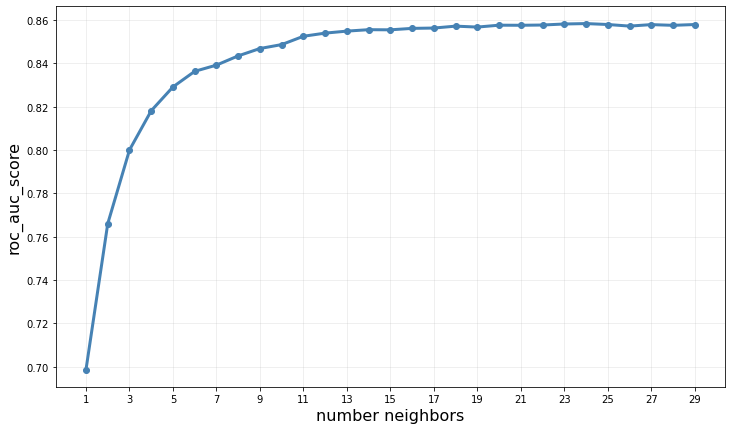

In [89]:
roc = []
allks = range(1,30)

for K in allks:
       
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train, y_train)
    val_yhat = knn.predict_proba(X_test)
    r = roc_auc_score(y_test, val_yhat[:,1])
    roc.append(r)

## you can use this code to create your plot    
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,7))
ax.plot(allks, roc, marker="o", color="steelblue", lw=3, label="unweighted")
ax.set_xlabel("number neighbors", fontsize=16)
ax.set_ylabel("roc_auc_score", fontsize=16)
plt.xticks(range(1,31,2))
ax.grid(alpha=0.25)

In [90]:
# get max roc_auc_score
print(max(roc))

0.8583843906868047


In [91]:
# the number of neighbors which get max roc_auc_score
max_index_roc = np.argmax(roc, axis=0)
print(allks[max_index_roc])

24


#### Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression

# train logistic regression model
logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [93]:
# make probability prediction on test set
log_yhat = logistic.predict_proba(X_test)

In [94]:
# roc curve for logistic regression model
fpr2, tpr2, thresh2 = roc_curve(y_test, log_yhat[:,1], pos_label=1)

In [95]:
# auc for logistic model
auc2 = roc_auc_score(y_test, log_yhat[:,1])
auc2

0.8230526685828137

In [96]:
# apply cross-validation method to the model and check the training accuracy
log_cv_scores = cross_val_score(logistic, X_train, y_train, cv=3 )
print("CV average score: %.2f" % log_cv_scores.mean())

CV average score: 0.80


In [97]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

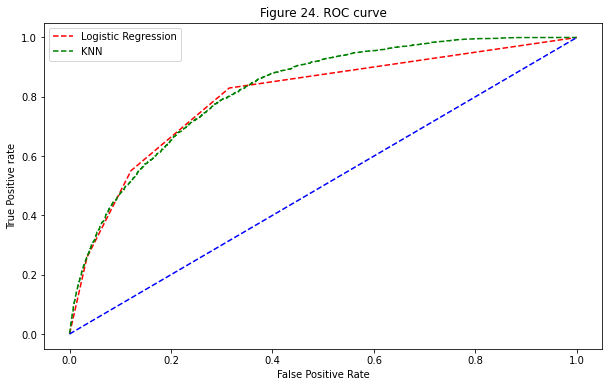

In [98]:
# plot roc curves

plt.subplots(figsize=(10,6))
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('Figure 24. ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

plt.show()

From figure 24 above, ROC curve and AUC is quite similar for KNN and Logistic Regression model. Therefore, we can say that logistic regression did a job as good as KNN of classifying the positive class in the dataset.

In [101]:
# compare the cv scores between 4 models
name = ["Random Forest", "Extra Trees", "Logistic Regression", "KNN"] 
acc = [random_acc, extra_acc, "NaN", "NaN"]
auc = ["NaN", "NaN", auc1, auc2]
score = [random_cv_scores.mean(), extra_cv_scores.mean(), log_cv_scores.mean(), knn_cv_scores.mean()]

pd.DataFrame(list(zip(name, acc, auc, score)), columns =['Model', "accuracy", "roc_auc", 'cv_scores'])

,Model,accuracy,roc_auc,cv_scores
0,Random Forest,0.816165,NaN,0.810760
1,Extra Trees,0.813079,NaN,0.806923
2,Logistic Regression,NaN,0.800032,0.802697
3,KNN,NaN,0.823053,0.792910


With the result from above, Random Forest has the highest cross validation score, however the differentiate of cross validaion score between models are quite small. Random Forest and Extra Trees have approximately accuracy score, Logistic Regression and KNN have approximately roc_auc_score.

## Part 5: Discussion and Conclusion

The goal of this project is to predict whether an individual’s income will be greater than $50,000 per year based on the adult income data and to conclude, I would like to summarize what I did and what I got from analyzing the dataset:  

+ First, by cleaning the data, I observed that there are some unuseful features and non-sense values, I dropped them. Moreover, there are some missing values in native country, workclass and occupation. With native country's missing values, I imputed by dropping them. I imputed missing values in workclass and occupation with the most frequent values. By count and plot the proportion of values in income level, I observed that our data is imbalance.

+ I raised some questions and answered them by visualizing and analyzing each features, this work helped me to determine the importance of each feature and how it affect to income level.

+ Before building models, I checked for the multicollinearity and I found that workclass and native country are two features that not useful for our models, so I dropped those two features and this result just is the same with the consider when I visualized before.

+ Because our data is classified data, I used random forest, extra trees, logistic regression and KNN method for building models and then compared the cross validation scores between them.


Analyze this data, I learned that in relationship with income level, there are two most important features are marital_status and age, the least important feature is race. Because of the imbalanced data, I used roc_auc to evaluate knn and logistic regression models. And the output tells us that Random Forest has the highest cross validation score, however the differentiate of cross validation score between models are quite small. Random Forest and Extra Trees have approximately accuracy score, Logistic Regression and KNN have approximately roc_auc_score. We see that our models gave a slightly better accuracy (81%). Our precision (60%) and recall (50%) are not the best, and more work needs to be done to improve them further.